## Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman']
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial']
rcParams['font.monospace'] = ['DejaVu Sans Mono', 'Consolas', 'Courier New']
rcParams['font.size'] = 11


1. Построить график функции 𝑦(𝑥) = -𝑥^2 + 𝑥 + 1, 𝑥 = -4, … , 4, добавив аннотации, обозначения осей 𝑂𝑥 и 𝑂𝑦, заголовок,
содержащий формулу функции.


In [2]:
def function(x):
    return -x**2 + x + 1

In [3]:
x = np.linspace(-4,4, num=10_000)
y = function(x)
x_ = -3

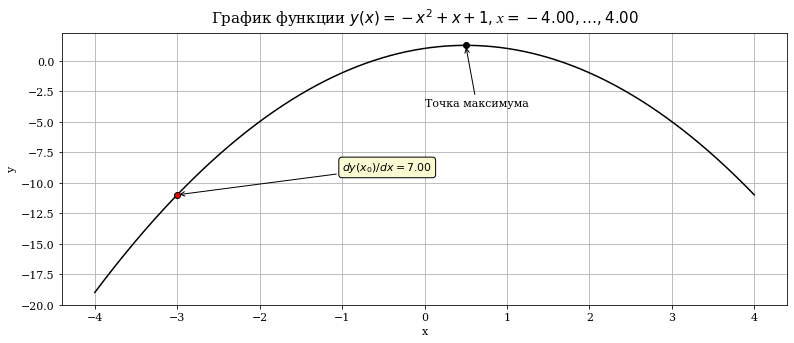

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
ax.plot(x, y, color='black')
ax.grid()
ax.set_title(r'График функции $у(x) = -x^{2} + x + 1, 𝑥 = -4.00, … , 4.00$',
             fontsize = 15, 
             pad = 10)

# оси
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x[np.where(y==y.max())], y.max(), marker='o', color='k', ls='') 
ax.plot(x_, function(x_), marker='o', color='k', ls='', markerfacecolor='r') 
arrowprops = {
    'arrowstyle': '->',
}


ax.annotate('Точка максимума',
             xy=(x[np.where(y==y.max())], y.max()),
             xytext=(0, y.max() -5),
             arrowprops=arrowprops)

ax.annotate(r'$dy(x_{0})/dx = 7.00$',
             xy=(x_, function(x_)),
             xytext=(x_ + 2, function(x_) +2),
             arrowprops=arrowprops,
             bbox=dict(boxstyle="round", fc="lightgoldenrodyellow"),)

fig.savefig('./result/task1.png', dpi=150)
plt.show()

2. Построить график функции распределения простых чисел.  
Требуется построить график функции 𝜋(𝑥), которая задаёт распределение простых чисел. Значения 𝜋(𝑥) равны количеству простых чисел, меньших либо равных действительному числу 𝑥.  
    1. Скачайте со страницы https://primes.utm.edu/lists/small/millions/ файл с первым миллионом простых чисел.  
    2. Для тестирования вашей реализации функции 𝜋(𝑥) используйте значения функции 𝜋(𝑥) для 𝑥, равных степени десятки 10𝑛 при 𝑛 от 0 до 26 (см. http://oeis.org/A006880/list ).  
    3. Для считывания простых чисел из файла можно использовать функции loadtxt или genfromtxt библиотеки NumPy. При этом начать считывать нужно с третьей строки, так как в первой строке содержится текстовое описание, а вторая строка служит разделителем и поэтому пустая. Кроме того, при считывании следует преобразовать данные в целый тип (опция dtype). Числа в файле расположены в несколько колонок, создавая таким образом при считывании многомерный массив, который необходимо преобразовать в одномерный массив. Для этого используйте метод flatten.  
    4. Для построения графика используйте функцию step библиотеки Matplotlib. Постройте точечный график для 60 первых чисел и линейчатый график для 200. 


In [5]:
# простые числа
file_primes = np.loadtxt('./data/primes1.txt', skiprows=2, dtype=int).flatten()
# степени десятки
example = np.array([(10**i) for i in range(1,27)])

In [6]:
def pi_func(x, primes):
    return [primes[primes <= i].size for i in x]

In [7]:
# распределение натуральных чисел 1...200
pi_func([10**i for i in range(27)], file_primes)

[0,
 4,
 25,
 168,
 1229,
 9592,
 78498,
 664579,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000]

итак, алгоритм правильный

In [8]:
# распределение натуральных чисел 1...200
natural = np.arange(1, 201)
distribution = pi_func(natural, file_primes)

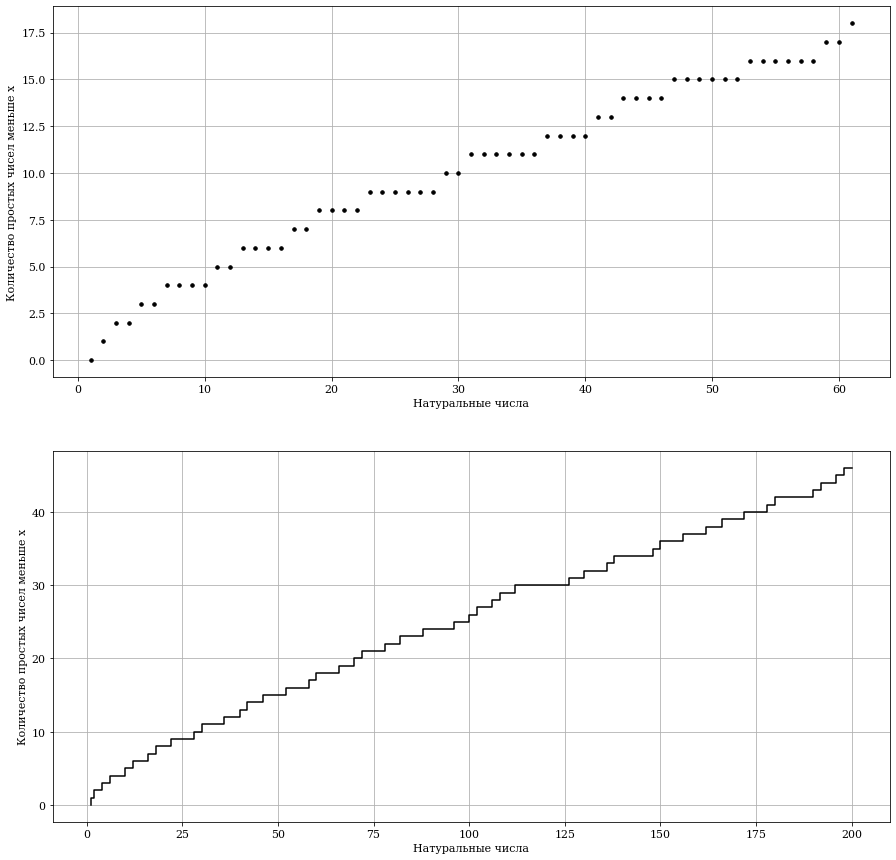

In [9]:
# точечный график для 60 первых чисел
fig, ax = plt.subplots(2)
fig.set_size_inches(15, 15)

ax[0].grid() # сетка
ax[0].step(natural[:61], distribution[:61], 'ko', markersize=3.5)

ax[0].set_xlabel('Натуральные числа')
ax[0].set_ylabel('Количество простых чисел меньше х')


# линейчатый график для 200 первых чисел
# ax.plot(x, y, color='black')
ax[1].grid() # сетка
ax[1].step(natural, distribution, color='black')
# оси
ax[1].set_xlabel('Натуральные числа')
ax[1].set_ylabel('Количество простых чисел меньше х')

plt.savefig('./result/task2.png', dpi=150)
plt.show()

3. Построить графики параметрических кривых эллипса и гиперболы с несовпадающими центрами (𝑥0, 𝑦0), но с одинаковыми параметрами 𝑎 и 𝑏. Для построения используйте следующие параметрические уравнения:

![explanation1.png](./data/explanation1.png)

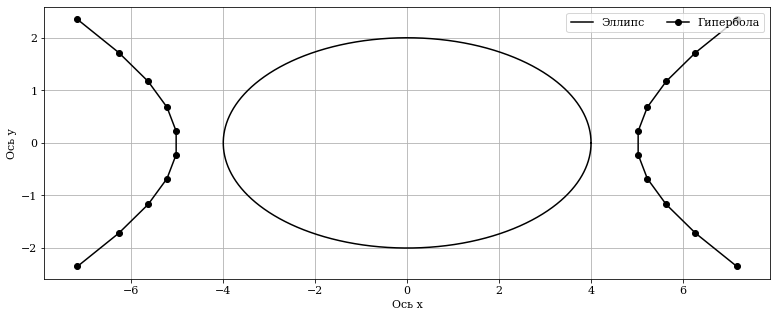

In [10]:
a, b = 4, 2
t = np.linspace(0,2 * np.pi, 10_000)
t_ = np.linspace(-1, 1, 10)
x0, y0 = 1,1

fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
# эллипс
ax.plot(a * np.cos(t), b * np.sin(t), "k", label = 'Эллипс')
# гипербола
ax.plot(-(x0 + a * np.cosh(t_)), b * np.sinh(t_), "ko-", 
        label = 'Гипербола')
ax.plot(x0 + a * np.cosh(t_), b * np.sinh(t_), "ko-")

ax.grid() # сетка
ax.legend(loc='upper right', ncol = 2)


# оси
ax.set_xlabel('Ось x')
ax.set_ylabel('Ось y')


plt.savefig('./result/task3_1.png', dpi=150)

plt.show()

Семейство эллипсов и гипербол образует координатные линии так называемой «эллиптической системы координат», которую чаще всего задают следующим образом:

![explanation1.png](./data/explanation2.png)

Координатные линии такой системы координат состоят из конфокальных эллипсов и гипербол.

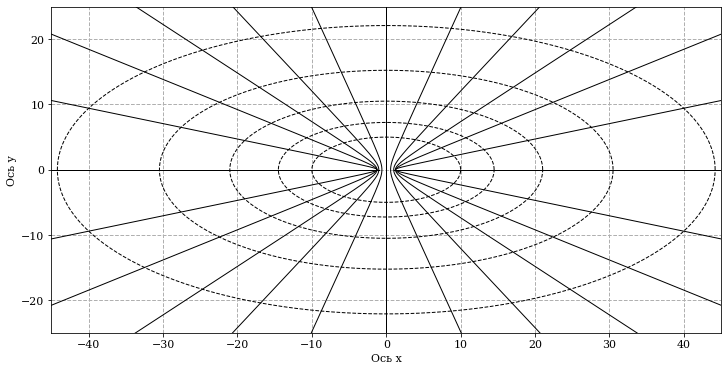

In [11]:
a =10 #!
b = 5  #!
v = np.linspace(0, 2 * np.pi, 1_000)
# u = np.linspace(0, 5, 1_000)
u = np.linspace(-5, 5, 1_000)
x0 = -5


fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

a_ = 10 #!
b_ = 5 #!

for i in range(1,6):
    ax.plot(a * np.cos(v), 
            b * np.sin(v), 
            "k--", linewidth=1)
    a *= 1.45
    b *= 1.45

v_ = np.linspace(0, np.pi/2, 7)

for i in range(0,7):
    
    x = -(np.cosh(u) * np.cos(v_[i]) * (1 + i * .25)) 
    xd = (np.cosh(u) * np.cos(v_[i]) * (1 + i * .25))

    y = np.sin(v_[i]) * np.sinh(u)  * (1 + i * .1)
    yd = np.sin(v_[i]) *  np.sinh(u)  * (1 + i * .1)
    
    ax.plot(x, y, "k-", linewidth=1)
    ax.plot(xd, yd, "k-", linewidth=1)


    
ax.grid(linestyle='--', linewidth=1) # сетка


# оси
ax.set_xlabel('Ось x')
ax.set_ylabel('Ось y')

plt.xlim([-45, 45])
plt.ylim([-25, 25])


plt.savefig('./result/task3_2.png', dpi=150)
plt.show()

4. Построить вектор, начинающийся в точке (0, 0; 0, 0). Реализуйте анимацию вращения вектора по и против часовой   
Требуется изобразить вектор, исходящий из начала координат и реализовать анимацию его вращения по и против часовой стрелки. Для того, чтобы изображение не изменялось в размере по мере вращения вектора, зафиксируйте максимальное и минимальное значения по осям 𝑂𝑥 и 𝑂𝑦. Для создания анимации можно применить утилиту ffmpeg или встроенные возможности библиотеки Matplotlib

In [12]:
import matplotlib.patches as patches
import subprocess
import os

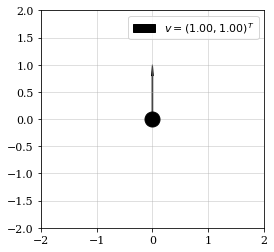

In [13]:
# против часовой

FOLDER1 = 'clock_backward'
FOLDER2 = 'clock'
try:
    os.mkdir(FOLDER1) 
    os.mkdir(FOLDER2) 
except FileExistsError:
    pass

fig = plt.figure(1)
ax = fig.add_subplot()
ax.plot(0, 0, "ko", markersize=15)
ax.set_ylim(-2,2, 1)
ax.set_xlim(-2,2, 1)
fig.set_size_inches(4, 4)


patch = patches.Arrow(0, 0, np.sin(0), np.cos(1), width = 0.5, color='black', label = r'$v = (1.00, 1.00)^{T}$')
ax.add_patch(patch)
ax.legend(loc='upper right', ncol = 2)
counter = 0
plt.grid(alpha = .5)


# против часовой
v = np.linspace(2 * np.pi, 0, 100)
for i in v:
    
    ax.patches = []
    patch = patches.Arrow(0, 0, np.sin(i), np.cos(i), 
                          width = 0.05, color='black', label = r'$v = (1.00, 1.00)^{T}$')
    ax.add_patch(patch)
    ax.legend(loc='upper right', ncol = 2)
    fig.savefig('{0}/{1:03d}.png'.format(FOLDER1, counter), dpi=300, format='png')
    counter += 1
    
    
# по часовой
v = np.linspace(0, 2 * np.pi, 100)
for i in v:
    
    ax.patches = []
    patch = patches.Arrow(0, 0, np.sin(i), np.cos(i), 
                          width = 0.05, color='black', label = r'$v = (1.00, 1.00)^{T}$')
    ax.add_patch(patch)
    ax.legend(loc='upper right', ncol = 2)
    fig.savefig('{0}/{1:03d}.png'.format(FOLDER2, counter), dpi=300, format='png')
    counter += 1


In [14]:
# по часовой
FFMPEG = '/usr/local/bin/ffmpeg'
CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', 'clock/%03d.png'.format(FOLDER1), 
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p',  '-vf', 'scale=300:300', 'clock.mp4'] 
subprocess.run(CMD)

CompletedProcess(args=['/usr/local/bin/ffmpeg', '-y', '-r', '30', '-f', 'image2', '-i', 'clock/%03d.png', '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', '-vf', 'scale=300:300', 'clock.mp4'], returncode=1)

In [15]:
# против часовой
FFMPEG = '/usr/local/bin/ffmpeg'
CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', 'clock_backward/%03d.png'.format(FOLDER2), 
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p',  '-vf', 'scale=300:300', 'clock_backward.mp4'] 
subprocess.run(CMD)

CompletedProcess(args=['/usr/local/bin/ffmpeg', '-y', '-r', '30', '-f', 'image2', '-i', 'clock_backward/%03d.png', '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', '-vf', 'scale=300:300', 'clock_backward.mp4'], returncode=0)

![clock.mp4](./clock.mp4)
![clock_backward.mp4](./clock_backward.mp4)

--------------------------
## Все полученные графики

### 1.

![task1.png](./result/task1.png)

### 2.

![task2_1.png](./result/task2.png)

### 3.

![task3.png](./result/task3_1.png)

![task3.png](./result/task3_2.png)

### 4.

![clock.mp4](./clock.mp4)
![clock_backward.mp4](./clock_backward.mp4)